In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.io as sio
import numpy as np

mat = sio.loadmat('ex7data2.mat')
mat.keys()
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data.head() #前5个数据

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


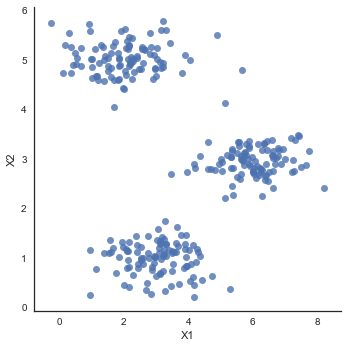

In [15]:
sns.set(context="notebook", style="white")
ax = sns.lmplot('X1','X2',data=data, fit_reg=False)
plt.show()

In [16]:
def combine_data_C(data, C):
    data_with_c = data.copy()
    data_with_c['C'] = C
    return data_with_c


# k-means fn --------------------------------
def random_init(data, k):
    """choose k sample from data set as init centroids
    Args:
        data: DataFrame
        k: int
    Returns:
        k samples: ndarray
    """
    return data.sample(k).as_matrix()


def _find_your_cluster(x, centroids):
    """find the right cluster for x with respect to shortest distance
    Args:
        x: ndarray (n, ) -> n features
        centroids: ndarray (k, n)
    Returns:
        k: int
    """
    distances = np.apply_along_axis(func1d=np.linalg.norm,  # this give you l2 norm
                                    axis=1,
                                    arr=centroids - x)  # use ndarray's broadcast
    return np.argmin(distances)


def assign_cluster(data, centroids):
    """assign cluster for each node in data
    return C ndarray
    """
    return np.apply_along_axis(lambda x: _find_your_cluster(x, centroids),
                               axis=1,
                               arr=data.as_matrix())


def new_centroids(data, C):
    data_with_c = combine_data_C(data, C)

    return data_with_c.groupby('C', as_index=False).\
                       mean().\
                       sort_values(by='C').\
                       drop('C', axis=1).\
                       as_matrix()


def cost(data, centroids, C):
    m = data.shape[0]

    expand_C_with_centroids = centroids[C]

    distances = np.apply_along_axis(func1d=np.linalg.norm,
                                    axis=1,
                                    arr=data.as_matrix() - expand_C_with_centroids)
    return distances.sum() / m


def _k_means_iter(data, k, epoch=100, tol=0.0001):
    """one shot k-means
    with early break
    """
    centroids = random_init(data, k)
    cost_progress = []

    for i in range(epoch):
        print('running epoch {}'.format(i))

        C = assign_cluster(data, centroids)
        centroids = new_centroids(data, C)
        cost_progress.append(cost(data, centroids, C))

        if len(cost_progress) > 1:  # early break
            if (np.abs(cost_progress[-1] - cost_progress[-2])) / cost_progress[-1] < tol:
                break

    return C, centroids, cost_progress[-1]


def k_means(data, k, epoch=100, n_init=10):
    """do multiple random init and pick the best one to return
    Args:
        data (pd.DataFrame)
    Returns:
        (C, centroids, least_cost)
    """

    tries = np.array([_k_means_iter(data, k, epoch) for _ in range(n_init)])

    least_cost_idx = np.argmin(tries[:, -1])

    return tries[least_cost_idx]

In [17]:
init_centroids = random_init(data, 3)
x = np.array([1, 1])

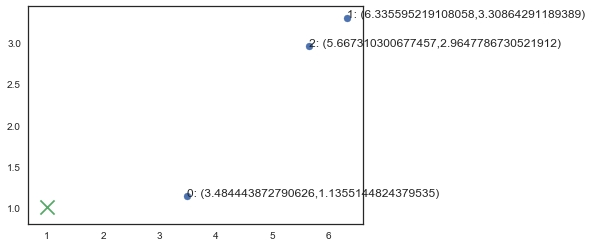

In [18]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x=init_centroids[:, 0], y=init_centroids[:, 1])

for i, node in enumerate(init_centroids):
    ax.annotate('{}: ({},{})'.format(i, node[0], node[1]), node)
    
ax.scatter(x[0], x[1], marker='x', s=200)
plt.show()

In [21]:
_find_your_cluster(x, init_centroids)
C = assign_cluster(data, init_centroids)
data_with_c =combine_data_C(data, C)
data_with_c.head()

,X1,X2,C
0,1.842080,4.607572,0
1,5.658583,4.799964,1
2,6.352579,3.290854,1
3,2.904017,4.612204,2
4,3.231979,4.939894,2


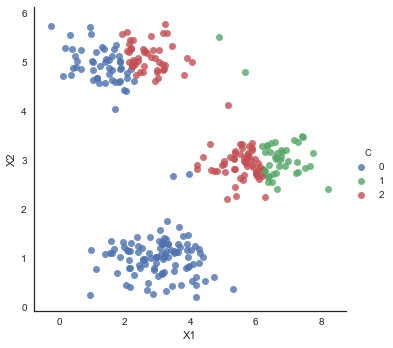

In [22]:
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()

running epoch 0
running epoch 1
running epoch 2
running epoch 3


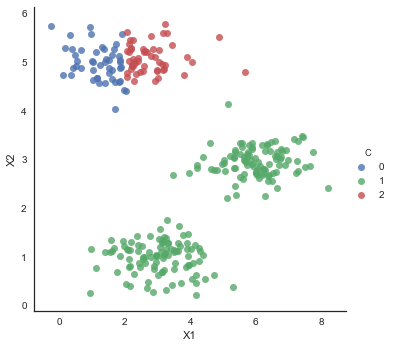

In [24]:
new_centroids(data, C)
final_C, final_centroid, _= _k_means_iter(data, 3)
data_with_c = combine_data_C(data, final_C)
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()

running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 0
running epoch 1
running epoch 2
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 6


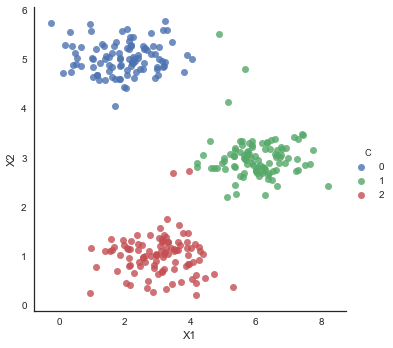

In [26]:
best_C, best_centroids, least_cost = k_means(data, 3)
least_cost
data_with_c = combine_data_C(data, best_C)
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()

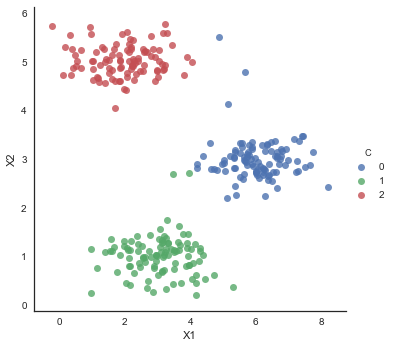

In [28]:
from sklearn.cluster import KMeans
sk_kmeans = KMeans(n_clusters=3)
sk_kmeans.fit(data)
sk_C = sk_kmeans.predict(data)
data_with_c = combine_data_C(data, sk_C)
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()